In [2]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr
import pickle

In [19]:
# version = 87804
# version = 72872
# version = 80525
# version = 15579
# version = 33060
# version = 11003

# version = 89776  # eps = 0.1
version = 69083  # eps = 0.001

results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
assert len(reg.equations_) == 2
results = reg.equations_[0]  # equations for predicting the mean

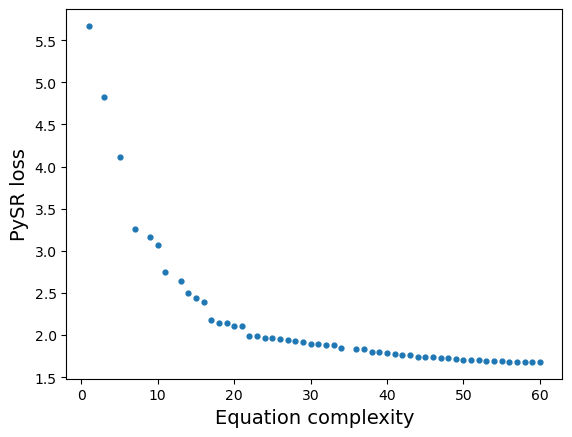

In [20]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y, s=12)
plt.xlabel('Equation complexity', fontsize=14)
plt.ylabel('PySR loss', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
# plt.ylim(0, max(y)+1)
# plt.title(f'pareto frontier for {version}')
plt.savefig(f'pareto_{version}.png')
plt.show()

In [21]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

print(len(labels) - len(skipped))

31


In [22]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.669899,0.000000,7.062153
1,3,4.821594,0.081033,(7.0518823 - m2)
2,5,4.111502,0.079658,((s4 ^ -0.30446142) - -3.3149471)
3,7,3.258717,0.116227,(((s4 ^ -0.15246001) / 0.2705219) - m2)
4,9,3.165148,0.014567,(((s4 ^ -0.15246001) / 0.2705219) - (m2 * 1.45...
5,10,3.071663,0.029981,(((s4 ^ -0.13964218) / 0.25305334) - (sin(m2) ...
6,11,2.754319,0.109049,((((s4 + (s1 * s6)) ^ -0.1640785) / 0.26384547...
7,13,2.638350,0.021508,((((s4 + (s1 * s6)) ^ -0.1640785) / 0.26384547...
8,14,2.497482,0.054871,((((s4 + (s6 * s1)) ^ -0.17136914) / 0.2644826...
9,15,2.437347,0.024373,(((((s4 / (1.7520077 ^ m7)) + (s6 * s1)) ^ -0....


In [23]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 7.062153
1 (7.0518823 - m2)
2 ((s4 ^ -0.30446142) - -3.3149471)
3 (((s4 ^ -0.15246001) / 0.2705219) - m2)
4 (((s4 ^ -0.15246001) / 0.2705219) - (m2 * 1.4548587))
5 (((s4 ^ -0.13964218) / 0.25305334) - (sin(m2) * 2.033292))
6 ((((s4 + (s1 * s6)) ^ -0.1640785) / 0.26384547) - m2)
7 ((((s4 + (s1 * s6)) ^ -0.1640785) / 0.26384547) - (m2 / 0.6685772))
8 ((((s4 + (s6 * s1)) ^ -0.17136914) / 0.2644826) - (m2 - sin(m7)))
9 (((((s4 / (1.7520077 ^ m7)) + (s6 * s1)) ^ -0.17136914) / 0.27029717) - m2)
10 (((((s4 / (1.7719306 ^ m7)) + (s6 * s1)) ^ -0.17136914) / 0.2644826) - sin(m2))
11 ((((((s4 ^ 0.4749142) + s1) / ((2.8435736 - m2) + m7)) ^ -0.35619837) / 0.61467874) / 0.57803017)
12 ((((((s4 ^ 0.4749142) + s1) / ((2.4583151 - sin(m2)) + m7)) ^ -0.35619837) / 0.57803017) / 0.57803017)
13 ((((((s4 ^ 0.4749142) + s1) / ((2.4583151 - sin(m2)) + m7)) ^ -0.35619837) / sin(0.61467874)) / 0.57803017)
14 ((((((s4 ^ 0.47613084) + s1) / ((2.4583151 - (sin(m2) - s1)) + m7)) ^ -0.37879598) / 0.6201565) / 0

In [25]:
s = reg.latex_table(precision=2, indices=[[1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], [ 1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29]], columns=['equation', 'complexity', 'loss'])

# replace m_ with \\mu_ and s_ with \\sigma_
s = s.replace('m_', '\\mu_')
s = s.replace('s_', '\\sigma_')

# remove the first 5 lines which are package imports
s = '\n'.join(s.split('\n')[5:])
print(s)

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}ccc@{}}
\toprule
Equation & Complexity & Loss \\
\midrule
$y_{0} = 7.1 - \mu_{2}$ & $3$ & $4.8$ \\
$y_{0} = - \mu_{2} + \frac{3.7}{\sigma_{4}^{0.15}}$ & $7$ & $3.3$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \frac{4.0}{\sigma_{4}^{0.14}} - 2.0 \sin{\left(\mu_{2} \right)} \end{dmath*} \end{minipage} & $10$ & $3.1$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = - 1.5 \mu_{2} + \frac{3.8}{\left(\sigma_{1} \sigma_{6} + \sigma_{4}\right)^{0.16}} \end{dmath*} \end{minipage} & $13$ & $2.6$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = - \mu_{2} + \frac{3.7}{\left(\sigma_{1} \sigma_{6} + 1.8^{- \mu_{7}} \sigma_{4}\right)^{0.17}} \end{dmath*} \end{minipage} & $15$ & $2.4$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \frac{2.8}{\left(\frac{\sigma_{1} + \sigma_{4}^{0.48}}{- \mu_{2} + \mu_{7} + 2.8}\right)^{0.36}} \end{dmath*} \end{minipage} 